### What needs to happen:
make the whole file into a huge binary mask? 
want to cutoff at 200x200 borders, instead of whole polygons as masks. 

- generate 200x200 all polygons as in normal data method
- do overlay with the jsoin intersection method 
- keep the intersections as labels per 200x200 polygon. 

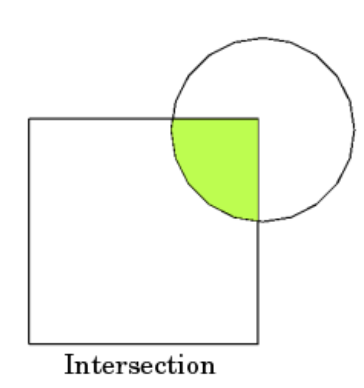

In [9]:
import geopandas as gpd

polygon_path = "/Users/nadja/Documents/UU/Thesis/Data/shp_truths/shp_palsa_truths.shp"
all_polygs = gpd.read_file(polygon_path)
rutor_path = "/Users/nadja/Documents/UU/Thesis/Data/shp_truths/rutor_truth.shp"
rutor = gpd.read_file(rutor_path)


In [35]:
all_polygs['centroid'] = all_polygs.representative_point()

In [39]:
all_polygs.geometry[0].bounds

(688149.8104874288, 7494524.192531442, 688161.7818712636, 7494544.942930089)

In [13]:
len(rutor)

16712

In [14]:
intersect = gpd.overlay(all_polygs, rutor, how='intersection')

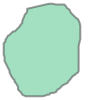

In [32]:
intersect.geometry[15]

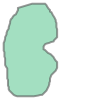

In [11]:
all_polygs.geometry[0]

In [7]:
type(all_polygs.geometry[0])

shapely.geometry.polygon.Polygon

In [ ]:
import rasterio.features
import matplotlib.pyplot as plt

poly = all_polygs.geometry[0]
img = rasterio.features.rasterize([poly], out_shape=(200, 200))
plt.imshow(img)